# ALWIS Workshop on Introduction to Cosmology and data analysing

### 1st. Check the recordings of the presentations to understand what we have modified and learnt from this code and feel free to play around

### 2nd. Few definitions of cosmological parameters that describe our universe. for more details about their defenitions and effects refer to prof. Wayne Hu page with animated demonstrations  https://background.uchicago.edu/ 


#### The cosmological parameters

$H_0$ :  The rate of expansion of the universe.

$\Omega_m$ : The total matter density parameter in the universe. ===> [$\Omega_m$ = $\Omega_b$ + $\Omega_c$]

$\Omega_b$ : Represents the density parameter for baryonic matter in the universe

$\Omega_c$ : Cold dark matter density parameter.

$\Omega_{\Lambda}$ : Dark energy density parameter.

$\Omega_k$ : Curvature Density Parameter.
* $\Omega_k$ > 0 : Open geometry
* $\Omega_k$ = 0 : Flat geometry
* $\Omega_k$ < 0 : Closed geometry

$\Omega_{total} = \Omega_m + \Omega_{\Lambda} + \Omega_k$. In the case of a flat universe $\Omega_{total} = \Omega_m + \Omega_{\Lambda} = 1 $ 

Let's check https://lambda.gsfc.nasa.gov for online tools

In [4]:
# important libraries i will be using
import healpy as hp  ## Healpix (Hierarchical Equal Area isoLatitude Pixelization)
import numpy as np   ## A library for scientific computing in Python
from classy import Class   ## Wrapper for Cosmic Linear Anisotropy Solving System code
import matplotlib.pyplot as plt   ## Plotting library in Python
plt.style.use('seaborn-talk')
import pylab

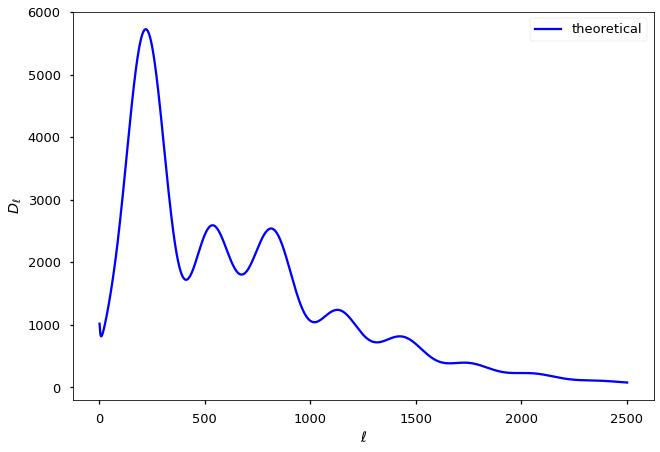

In [36]:
##### Planck 2018 best fit arxiv.org/pdf/1807.06209 #####

common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
                      'output':'tCl,pCl,lCl',
                      'lensing':'yes',
#                       'A_lens': 1.,
#                       LambdaCDM parameters
                      'h':0.6732,
#                       'A_lens': 0.14 ,
                      'omega_b':0.022383,
                      'omega_cdm':0.12011,
                      'Omega_k':0,
                      'ln10^{10}A_s': 3.0448,
                      #'N_ur' : 3,
                      'n_s':0.96605,
                      'z_reio' : 7.68,
                      #'stat_f_idr' :0.875 ,
                      'YHe':0.246727,
#                       'm_ncdm' : [0.06],
                      # other output and precision parameters
                      'l_max_scalars':5000}

M = Class()
M.set(common_settings)
M.compute()
cl_tot = M.raw_cl(2501)
cl_len = M.lensed_cl(2501)
ell = cl_tot['ell'][2:]

factor = ell*(ell+1.)/2./np.pi
T_cmb=  2.7255e6
dl_lensed = factor*cl_len['tt'][2:]*T_cmb**2


plt.plot(ell, dl_lensed, 'b', label = 'theoretical')

plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.show()

In [37]:
##### Planck 2018 best fit arxiv.org/pdf/1807.06209 #####

common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
                      'output':'tCl,pCl,lCl',
                      'lensing':'yes',
#                       'A_lens': 1.,
#                       LambdaCDM parameters
                      'h':0.7,
#                       'A_lens': 0.14 ,
                      'omega_b':0.03,
                      'omega_cdm':0.11,
                      'Omega_k':0,
                      'ln10^{10}A_s': 3.0448,
                      #'N_ur' : 3,
                      'n_s':0.96605,
                      'z_reio' : 7.68,
                      #'stat_f_idr' :0.875 ,
                      'YHe':0.246727,
#                       'm_ncdm' : [0.06],
                      # other output and precision parameters
                      'l_max_scalars':5000}

M = Class()
M.set(common_settings)
M.compute()
cl_tot = M.raw_cl(2501)
cl_len = M.lensed_cl(2501)
ell = cl_tot['ell'][2:]

factor = ell*(ell+1.)/2./np.pi
T_cmb=  2.7255e6
dl_lensed_test = factor*cl_len['tt'][2:]*T_cmb**2


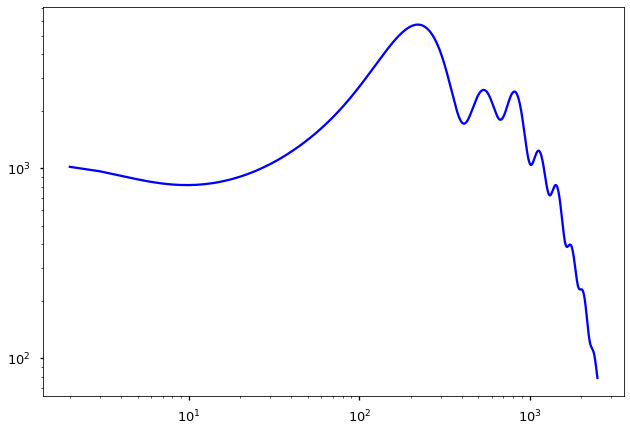

In [4]:
plt.loglog(ell, dl_lensed, 'b', label = 'theoretical')
plt.show()

### Let's use data from Planck For this we will need to use healpy 


In [8]:
cmb_map = hp.read_map('/share/storage1/simulations/horizon/planck/COM_CMB_IQU-commander_2048_R3.00_full.fits')

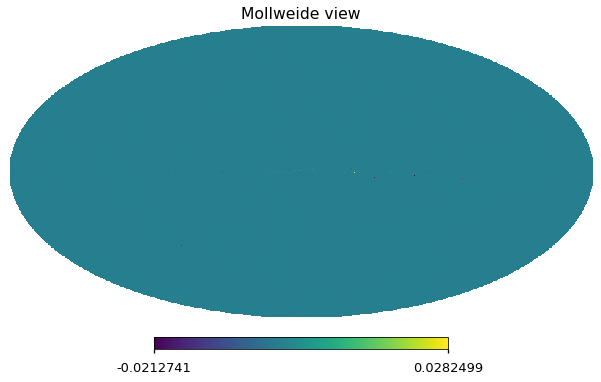

In [9]:
hp.mollview(cmb_map)

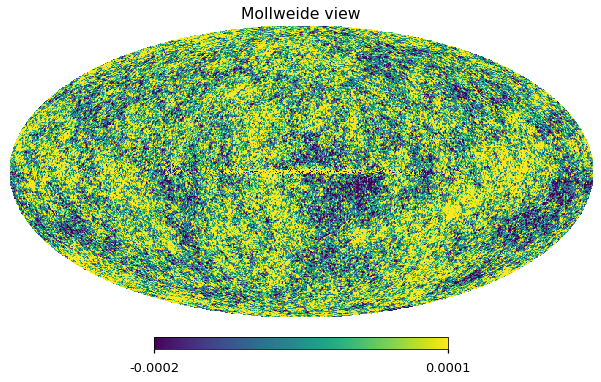

In [16]:
hp.mollview(cmb_map,min=-0.0002 , max=0.0001 )

### The mask 

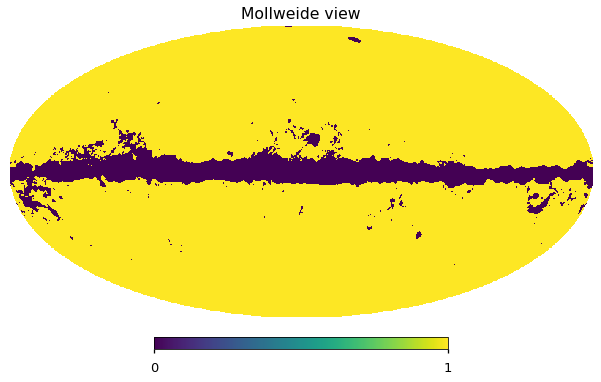

In [17]:
map_mask = hp.read_map('/share/storage1/simulations/horizon/planck/COM_CMB_IQU-commander_2048_R3.00_full.fits' ,field=3)
hp.mollview(map_mask)

### Applying the mask

In [21]:
masked = cmb_map * map_mask

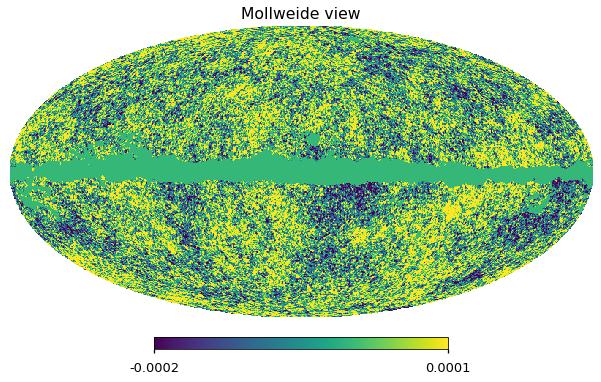

In [22]:
hp.mollview(masked, min=-0.0002 , max=0.0001 )

### Power spectrum 

In [23]:
cls_from_map = hp.sphtfunc.anafast(cmb_map, map2=None, nspec=None, lmax=None, mmax=None, iter=3, 
                                       alm=False, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
cls_from_map

array([2.48880070e-12, 4.74326913e-12, 1.93290741e-10, ...,
       5.60084670e-20, 5.01110256e-20, 5.29486387e-20])

In [24]:
cls_from_masked_map = hp.sphtfunc.anafast(masked, map2=None, nspec=None, lmax=None, mmax=None, iter=3, 
                                       alm=False, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
cls_from_masked_map

array([6.92586964e-12, 5.63581501e-12, 1.67322524e-10, ...,
       1.34553138e-18, 1.48477821e-18, 1.43252626e-18])

In [21]:
cls_from_map.shape

(6144,)

In [30]:
ell[:2500].shape , cls_from_masked_map[2:2500].shape

((2500,), (2498,))

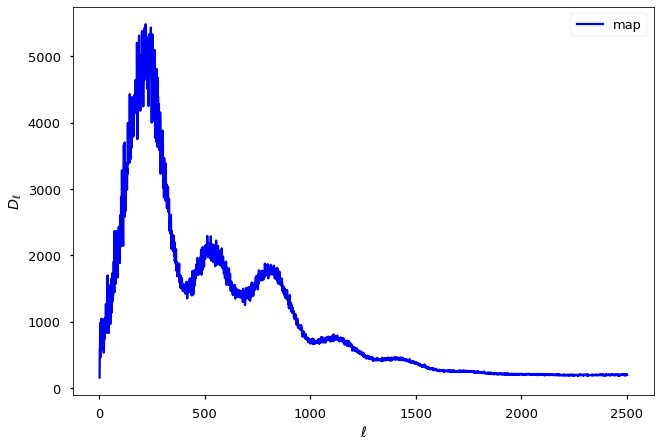

In [31]:
ell = np.arange(2, cls_from_map.shape[0])

plt.plot(ell[:2500], ell[:2500]*(ell[:2500]+1)*cls_from_masked_map[2:2502]*10**12/(2*np.pi), 'b', label = 'map')
# plt.plot(ell, ell*(ell+1)*cls_from_masked_map[2:]/(2*np.pi), 'k', label = 'masked map')

plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.show()

### After applying the mask, compare with the theoretical power spectrum

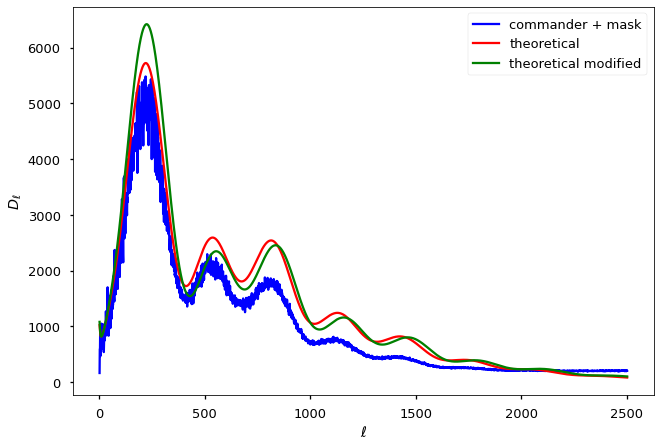

In [38]:
plt.plot(ell[:2500], ell[:2500]*(ell[:2500]+1)*cls_from_masked_map[2:2502]*10**12/(2*np.pi), 'b', label = 'commander + mask')

# plt.scatter(ell, ell*(ell+1)*....*10**12/(2*np.pi), label = 'commander + mask')
# plt.plot(ell, .... , label = 'theoretical')
plt.plot(ell[:2500], dl_lensed, 'r', label = 'theoretical')
plt.plot(ell[:2500], dl_lensed_test, 'g', label = 'theoretical modified')


plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.show()

### Let's go back to the homework file and visualize it

In [45]:
%pwd

'/home/rahima'

In [46]:
data = np.loadtxt("/share/storage1/simulations/horizon/planck/COM_PowerSpect_CMB-TT-full_R3.01.txt")


In [41]:
import pandas as pd

pd.DataFrame(data)


,0,1,2,3
0,2.0,225.895000,132.369000,533.062000
1,3.0,936.920000,450.471000,1212.308000
2,4.0,692.238000,294.111000,666.469000
3,5.0,1501.705000,574.432000,1155.804000
4,6.0,557.611000,201.242000,375.763000
...,...,...,...,...
2502,2504.0,212.915616,110.537143,110.537143
2503,2505.0,54.752355,110.824874,110.824874
2504,2506.0,-149.315007,111.110198,111.110198
2505,2507.0,-71.474213,111.427400,111.427400


In [42]:
ell_planck = data[:,0]
dls_planck = data[:,1]
ell_planck , dls_planck

(array([2.000e+00, 3.000e+00, 4.000e+00, ..., 2.506e+03, 2.507e+03,
        2.508e+03]),
 array([ 225.895    ,  936.92     ,  692.238    , ..., -149.315007 ,
         -71.4742134,   51.6327312]))

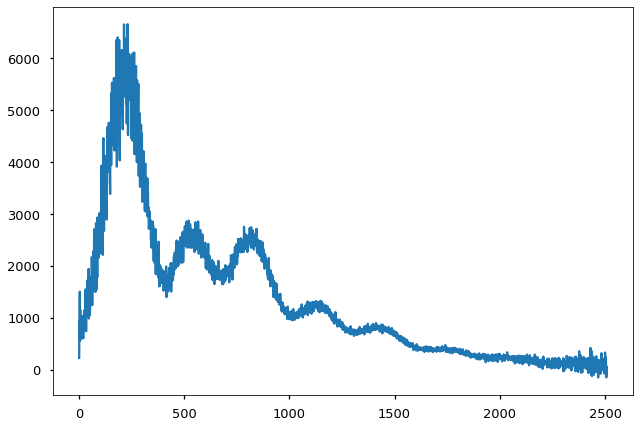

In [43]:
plt.plot(ell_planck, dls_planck)

In [10]:
#### use pandas to visualize the files columns

### Plot with the errors 

### Let's try with the dark matter halo catalogue simulations

In [14]:
from nbodykit.lab import *
import h5py

In [15]:
catalog1 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.2/halo/halo.z0.2_11.4_11.5.hdf5')
f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.2/halo/halo.z0.2_11.4_11.5.hdf5', 'r')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
    
catalog1['Position'] = a1
catalog1['Mass'] = np.asarray(f2.get('mass')) 


In [88]:
np.asarray(catalog1['Mass']).shape

(56026776,)

In [16]:
catalog1['Position']

dask.array<array, shape=(55800748, 3), dtype=float64, chunksize=(100000, 3), chunktype=numpy.ndarray>

In [17]:
from matplotlib import pyplot as plt
from nbodykit import style, setup_logging
plt.style.use(style.notebook)

BoxSize = np.asarray(catalog1['Position']).max()

mesh = catalog1.to_mesh(Nmesh=128, BoxSize = BoxSize , window = 'cic',position='Position')

density = mesh.paint(mode='real')

/home/rahima/anaconda3/envs/nbody/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  import sys


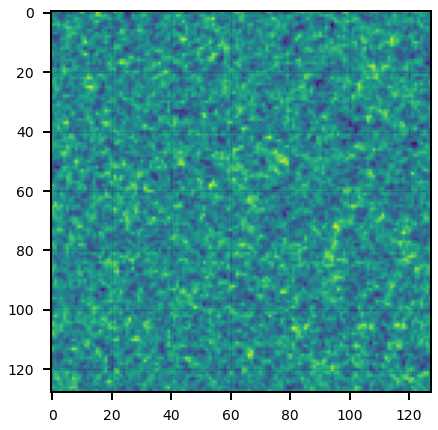

In [91]:
density_plot = density.preview(Nmesh=128, axes=(0,1))

plt.imshow(density_plot)
plt.show()


In [24]:
r = FFTPower(mesh, mode='1d')  #, dk=0.005, kmin=0.01

(0.01, 0.6)

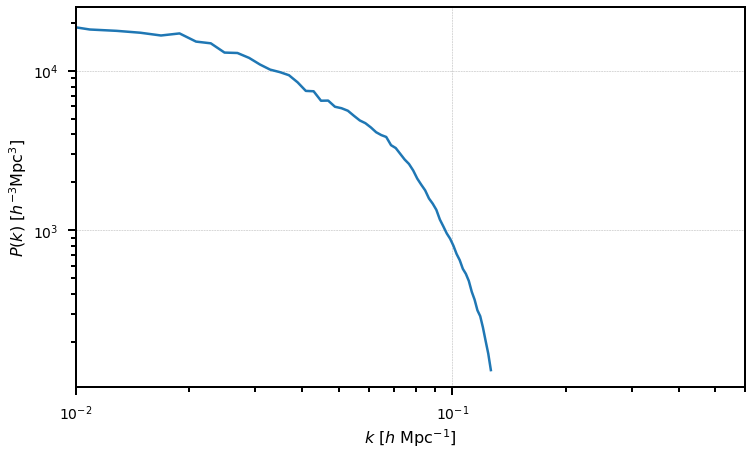

In [25]:
Pk = r.power
# print the shot noise subtracted P(k)
plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)



In [92]:
############## WMAP5 ######################
hw = 0.72
cosdict = {'omega_cdm':0.1119744,
           'omega_b':0.02280959,
           'h':hw,
           'n_s':0.96,
           'sigma8':0.79365,
           'Omega_Lambda' : 0.74,
           'w0_fld' : -1.0,
           'wa_fld' : 0.0,           
           'z_max_pk': 60,
           'gauge': 'synchronous',
           'P_k_max_1/Mpc':6000,
           'output': 'mPk'} 
# call CLASS 
cosmo_w = Class()
cosmo_w.set(cosdict)
cosmo_w.compute()

In [94]:
def pk_fun_m0(k, z_original):
    return cosmo_w.pk(k*hw, z_original)*hw**3

z_wmap = 0.2

In [95]:
k_interval = np.linspace(10**-2, 1.2, 10000)
p_wmap = []

for i in k_interval:
    dl_p = pk_fun_m0(i, z_wmap)
    p_wmap.append(dl_p)

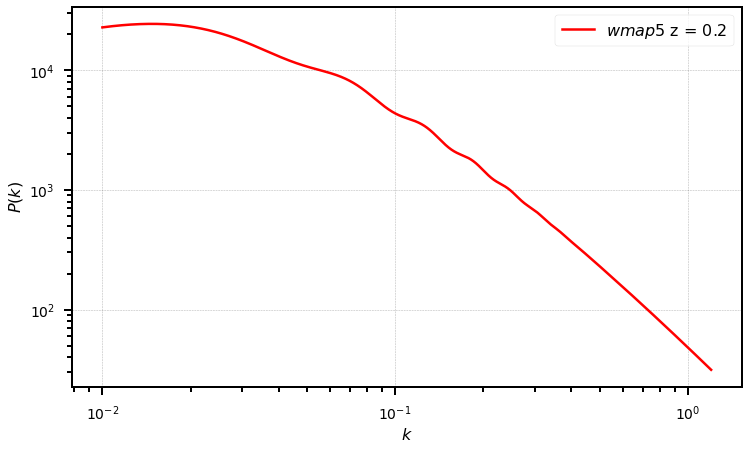

In [38]:

plt.plot(k_interval , p_wmap, 'r', label='$wmap5$ z = {:.1f}'.format(z_wmap))
plt.xlabel('$k$')
plt.ylabel('$P(k) $')
plt.yscale("log")
plt.xscale("log")
pylab.legend(loc='best')
plt.show()

### Let's try comparing the observational to the theoretical

In [101]:
# k_interval = k_catalog_original
p_wmap = []

for i in k_catalog_original:
    dl_p = pk_fun_m0(i, z_wmap)
    p_wmap.append(dl_p)

In [99]:
k_catalog_original.max()

0.19845430372816716

In [103]:
k_interval.shape

(10000,)

In [105]:
np.asarray(p_wmap).shape

(100,)

/home/rahima/anaconda3/envs/nbody/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


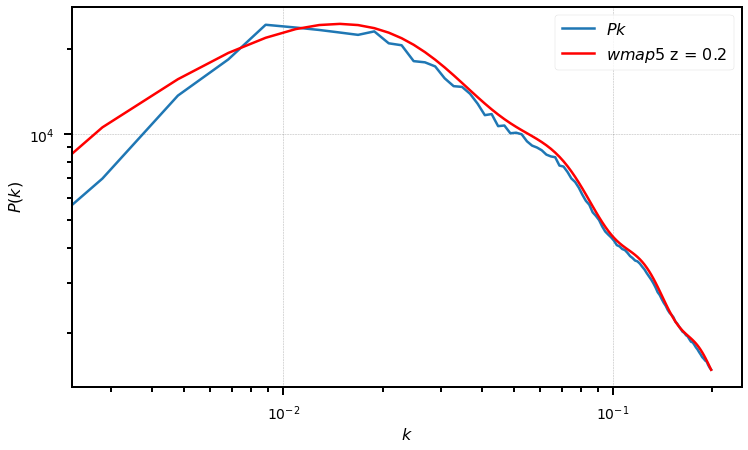

In [111]:
#### You need to divide by the bias to fairly compare the 2 matter power spectra

plt.loglog(k_catalog_original, power_catalog_original , label=r"$Pk$")
plt.plot(k_catalog_original , p_wmap, 'r', label='$wmap5$ z = {:.1f}'.format(z_wmap))

plt.xlabel('$k$')
plt.ylabel('$P(k) $')
plt.yscale("log")
plt.xscale("log")
pylab.legend(loc='best')

In [47]:
catalog1 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.4_11.5.hdf5')
catalog2 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.5_11.6.hdf5')
catalog3 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.6_11.7.hdf5')
catalog4 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.7_11.8.hdf5')
catalog5 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.8_11.9.hdf5')
catalog6 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.9_12.0.hdf5')
catalog7 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.0_12.1.hdf5')
catalog8 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.1_12.2.hdf5')
catalog9 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.2_12.3.hdf5')
catalog10 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.3_12.4.hdf5')
catalog11 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.4_12.5.hdf5')
catalog12 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.5_12.6.hdf5')
catalog13 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.6_12.7.hdf5')
catalog14 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.7_12.8.hdf5')
catalog15 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.8_12.9.hdf5')
catalog16 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.9_13.0.hdf5')
catalog17 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.0_13.1.hdf5')
catalog18 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.1_13.2.hdf5')
catalog19 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.2_13.3.hdf5')
catalog20 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.3_13.4.hdf5')
catalog21 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.4_13.5.hdf5')
catalog22 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.5_13.6.hdf5')
catalog23 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.6_13.7.hdf5')
catalog24 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.7_13.8.hdf5')
catalog25 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.8_13.9.hdf5')
catalog26 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.9_14.0.hdf5')
catalog27 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.0_14.1.hdf5')
catalog28 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.1_14.2.hdf5')
catalog29 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.2_14.3.hdf5')
catalog30 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.3_14.4.hdf5')
catalog31 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.4_14.5.hdf5')
catalog32 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.5_14.6.hdf5')
catalog33 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.6_14.7.hdf5')
catalog34 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.7_14.8.hdf5')
catalog35 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.8_14.9.hdf5')
catalog36 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.9_15.0.hdf5')
catalog37 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.0_15.1.hdf5')
catalog38 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.1_15.2.hdf5')
catalog39 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.2_15.3.hdf5')
catalog40 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.3_15.4.hdf5')
catalog41 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.4_15.5.hdf5')
catalog42 = HDFCatalog('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.5_15.6.hdf5')

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.4_11.5.hdf5', 'r')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
    
catalog1['Position'] = a1
catalog1['Mass'] = np.asarray(f2.get('mass')) 


f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.5_11.6.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog2['Position'] = a1
catalog2['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.6_11.7.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog3['Position'] = a1
catalog3['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.7_11.8.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog4['Position'] = a1
catalog4['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.8_11.9.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog5['Position'] = a1
catalog5['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_11.9_12.0.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog6['Position'] = a1
catalog6['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.0_12.1.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog7['Position'] = a1
catalog7['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.1_12.2.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog8['Position'] = a1
catalog8['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.2_12.3.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog9['Position'] = a1
catalog9['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.3_12.4.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog10['Position'] = a1
catalog10['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.4_12.5.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog11['Position'] = a1
catalog11['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.5_12.6.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog12['Position'] = a1
catalog12['Mass'] = np.asarray(f2.get('mass')) 

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.6_12.7.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog13['Position'] = a1
catalog13['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.7_12.8.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog14['Position'] = a1
catalog14['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.8_12.9.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog15['Position'] = a1
catalog15['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_12.9_13.0.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog16['Position'] = a1
catalog16['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.0_13.1.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog17['Position'] = a1
catalog17['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.1_13.2.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog18['Position'] = a1
catalog18['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.2_13.3.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog19['Position'] = a1
catalog19['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.3_13.4.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog20['Position'] = a1
catalog20['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.4_13.5.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog21['Position'] = a1
catalog21['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.5_13.6.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog22['Position'] = a1
catalog22['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.6_13.7.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog23['Position'] = a1
catalog23['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.7_13.8.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog24['Position'] = a1
catalog24['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.8_13.9.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog25['Position'] = a1
catalog25['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_13.9_14.0.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog26['Position'] = a1
catalog26['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.0_14.1.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog27['Position'] = a1
catalog27['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.1_14.2.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog28['Position'] = a1
catalog28['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.2_14.3.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog29['Position'] = a1
catalog29['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.3_14.4.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog30['Position'] = a1
catalog30['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.4_14.5.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog31['Position'] = a1
catalog31['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.5_14.6.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog32['Position'] = a1
catalog32['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.6_14.7.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog33['Position'] = a1
catalog33['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.7_14.8.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog34['Position'] = a1
catalog34['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.8_14.9.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog35['Position'] = a1
catalog35['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_14.9_15.0.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog36['Position'] = a1
catalog36['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.0_15.1.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog37['Position'] = a1
catalog37['Mass'] = np.asarray(f2.get('mass'))


f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.1_15.2.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog38['Position'] = a1
catalog38['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.2_15.3.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog39['Position'] = a1
catalog39['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.3_15.4.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog40['Position'] = a1
catalog40['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.4_15.5.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog41['Position'] = a1
catalog41['Mass'] = np.asarray(f2.get('mass'))

f2 = h5py.File('/share/storage1/simulations/horizon/horizon_halos/halo.z0.3/halo/halo.z0.3_15.5_15.6.hdf5')
ls = list(f2.keys())
x2 = np.asarray(f2.get('x'))
y2 = np.asarray(f2.get('y'))
z2 = np.asarray(f2.get('z'))
a1 = np.zeros((int(len(x2)), 3))
for i in range(len(x2)):
    a1[i, :] = x2[i],y2[i],z2[i]
catalog42['Position'] = a1
catalog42['Mass'] = np.asarray(f2.get('mass'))


In [49]:
##### read combined catalogs ######
combined_wmap_original = transform.ConcatenateSources(catalog1,catalog2,catalog3,catalog4,catalog5,catalog6,catalog7  
                                                      ,catalog8, catalog9, catalog10, catalog11, catalog12, catalog13,catalog14,
                                                      catalog15, catalog16, catalog17, catalog18,catalog19, catalog20, catalog21, 
                                                      catalog22, catalog23,catalog24, catalog25, catalog26, catalog27, catalog28,
                                                      catalog29, catalog30, catalog32, catalog33,catalog34, catalog35, catalog36, 
                                                      catalog37, catalog38,catalog39, catalog40, catalog41, catalog42, 
                                                      columns=['Position', 'Mass'])

#### pk and k ########

power_original = FFTPower(combined_wmap_original, mode='1d', Nmesh=200, BoxSize = 3150)
power_catalog_original = power_original.power['power'] 
k_catalog_original = power_original.power['k']
power_catalog_original_sh = power_catalog_original.real - power_original.attrs['shotnoise']

/home/rahima/anaconda3/envs/nbody/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


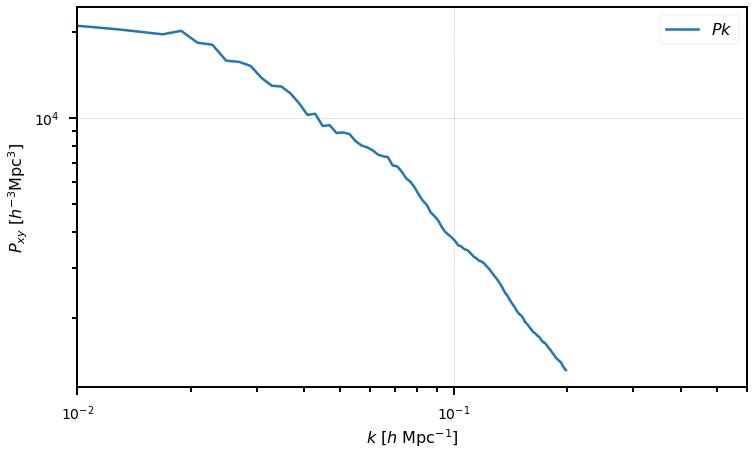

In [51]:
# pk_shotnoise = pk.real - power_original.attrs['shotnoise']

plt.loglog(k_catalog_original, power_catalog_original , label=r"$Pk$")
# plt.loglog(k_catalog_original, power_catalog_original_sh , label=r"$Pk$ without shotnoise")

plt.legend(loc='best', ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P_{xy}$ [$h^{-3} \mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)
plt.show()

In [53]:
z_wmap = 0.3
k_interval = k_catalog_original
p_wmap = []

for i in k_interval:
    dl_p = pk_fun_m0(i, z_wmap)
    p_wmap.append(dl_p)

/home/rahima/anaconda3/envs/nbody/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


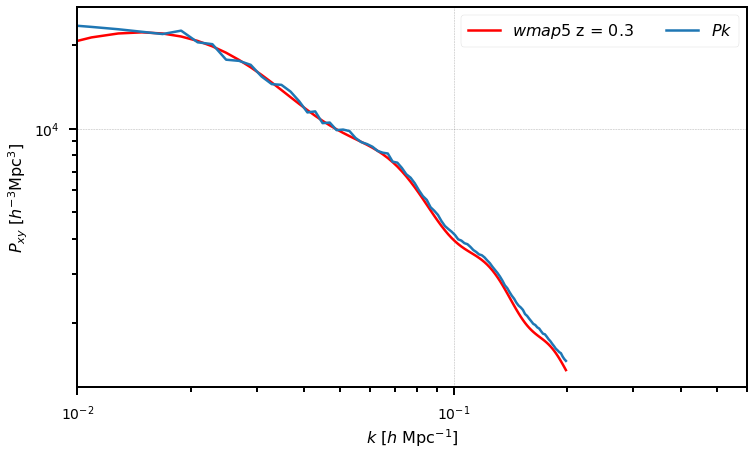

In [55]:
plt.plot(k_interval , p_wmap, 'r', label='$wmap5$ z = {:.1f}'.format(z_wmap))

plt.loglog(k_catalog_original, power_catalog_original , label=r"$Pk$")
# plt.loglog(k_catalog_original, power_catalog_original_sh , label=r"$Pk$ without shotnoise")

plt.legend(loc='best', ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P_{xy}$ [$h^{-3} \mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)
plt.show()

### Theoretical cosmological models in nbodykit

In [121]:
from nbodykit.lab import cosmology

planck15 = cosmology.Planck15
wmap5 = cosmology.WMAP5
wmap7 = cosmology.WMAP7

planck15.sigma8 , wmap7.sigma8

(0.8158115994376975, 0.8108118905575576)

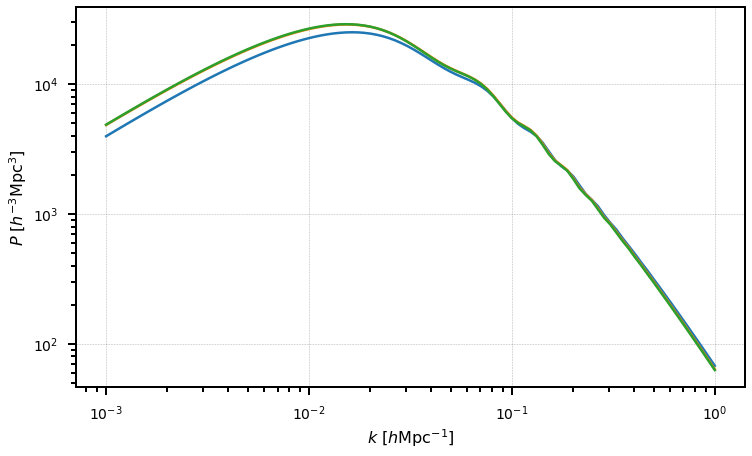

In [123]:
P_planck = cosmology.LinearPower(planck15, redshift=0., transfer='CLASS')
P_wmap5 = cosmology.LinearPower(wmap5, redshift=0., transfer='CLASS')
P_wmap7 = cosmology.LinearPower(wmap7, redshift=0., transfer='CLASS')

k = np.logspace(-3, 0, 100)
plt.loglog(k, P_planck(k), label = 'planck15')
plt.loglog(k, P_wmap5(k), label = 'wmap5')
plt.loglog(k, P_wmap7(k), label = 'wmap7')

plt.xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$")
plt.show()


In [115]:
############## Planck ######################
hp = 0.677
cosdict = {'omega_cdm':0.12,
           'omega_b':0.023,
           'h':hp,
           'n_s':0.96,
           'sigma8':0.79365,
           'Omega_Lambda' : 0.74,
           'w0_fld' : -1.0,
           'wa_fld' : 0.0,           
           'z_max_pk': 60,
           'gauge': 'synchronous',
           'P_k_max_1/Mpc':6000,
           'output': 'mPk'} 
# call CLASS 
cosmo_p = Class()
cosmo_p.set(cosdict)
cosmo_p.compute()

def pk_fun_mp(k, z_original):
    return cosmo_p.pk(k*hp, z_original)*hp**3

z_wmap = 0.2
k_interval = np.linspace(10**-2, 1.2, 10000)

p_wmap = []

for i in k_interval:
    dl_p = pk_fun_m0(i, z_wmap)
    p_wmap.append(dl_p)
    
p_planck = []

for i in k_interval:
    dl_p = pk_fun_mp(i, z_wmap)
    p_planck.append(dl_p)    
    


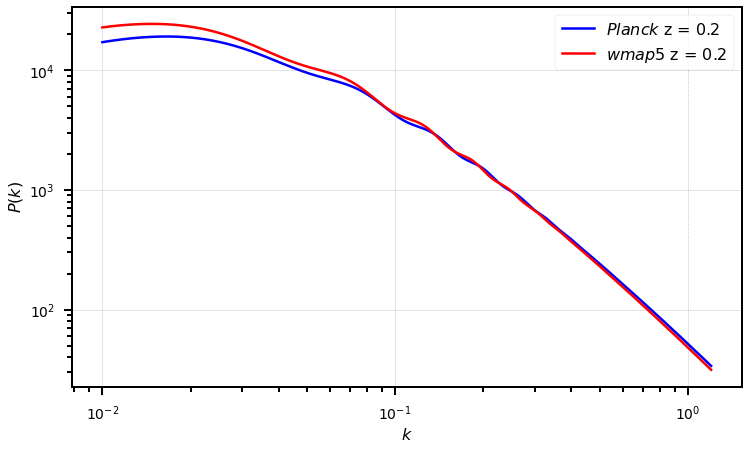

In [117]:
plt.plot(k_interval , p_planck, 'b', label='$Planck$ z = {:.1f}'.format(z_wmap))
plt.plot(k_interval , p_wmap, 'r', label='$wmap5$ z = {:.1f}'.format(z_wmap))

plt.xlabel('$k$')
plt.ylabel('$P(k) $')
plt.yscale("log")
plt.xscale("log")
pylab.legend(loc='best')
plt.show()

### Open source code

### Let's check SNe data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/home/rahima/supernovas+SHOES/PantheonPlus_exemplo01/Pantheon+SH0ES.dat',delim_whitespace=True)
data

,CID,IDSURVEY,zHD,zHDERR,zCMB,zCMBERR,zHEL,zHELERR,m_b_corr,m_b_corr_err_DIAG,...,PKMJDERR,NDOF,FITCHI2,FITPROB,m_b_corr_err_RAW,m_b_corr_err_VPEC,biasCor_m_b,biasCorErr_m_b,biasCor_m_b_COVSCALE,biasCor_m_b_COVADD
0,2011fe,51,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.74571,1.516210,...,0.1071,36,26.88590,0.864470,0.0991,1.4960,0.0381,0.005,1.000,0.003
1,2011fe,56,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.80286,1.517230,...,0.0579,101,88.30640,0.812220,0.0971,1.4960,-0.0252,0.003,1.000,0.004
2,2012cg,51,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.47030,0.781906,...,0.0278,165,233.50000,0.000358,0.0399,0.7134,0.0545,0.019,1.000,0.036
3,2012cg,56,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.49190,0.798612,...,0.0667,55,100.12200,0.000193,0.0931,0.7134,0.0622,0.028,1.000,0.040
4,1994DRichmond,50,0.00299,0.00084,0.00299,0.00004,0.00187,0.00004,11.52270,0.880798,...,0.0522,146,109.83900,0.988740,0.0567,0.6110,0.0650,0.009,1.000,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,rutledge,106,1.61505,0.00545,1.61499,0.00500,1.61399,0.00500,25.90650,0.331927,...,1.7256,8,2.92493,0.938980,0.2230,0.0106,-0.0203,0.005,1.000,0.002
1697,geta,106,1.69706,0.04006,1.69702,0.04000,1.70000,0.04000,26.03330,0.379521,...,1.8973,12,9.15387,0.689730,0.3209,0.0748,0.2680,0.005,0.633,0.000
1698,stone,106,1.80119,0.02014,1.80111,0.02000,1.80000,0.02000,26.23350,0.280685,...,1.1631,11,11.69320,0.387140,0.2370,0.0358,-0.0968,0.004,0.641,0.000
1699,wilson,106,1.91165,0.00263,1.91160,0.00100,1.91401,0.00100,26.17030,0.357624,...,1.4902,9,5.54378,0.784570,0.3168,0.0044,-0.3835,0.013,0.604,0.000


In [125]:
zcmb = data['zCMB']
zcmb.min() , zcmb.max()

(0.00122, 2.2613)

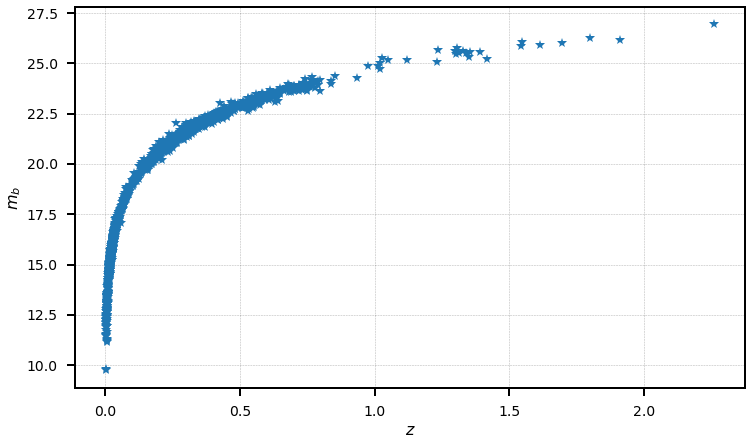

In [65]:
plt.plot(zcmb, mb , '*')
plt.xlabel(r"$z$")
plt.ylabel(r"$m_b$")

plt.show()